In [15]:
#Tratamieto de datos
import pandas as pd 
import numpy as np  
# ==============================================================================================================================================================

#   Gráficos 
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# ==============================================================================================================================================================

#Procesado y Modelado
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score)
from sklearn.preprocessing import binarize
from sklearn.metrics import roc_curve

#REGRESIÓN LOGÍSTICA MULTICLASS
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
#import statsmodels.formula.api as smf
# from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor
# ==============================================================================================================================================================

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
# Configuración warnings
# ==============================================================================================================================================================

#Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_excel(r"D:\Never Urueta\2023\Algoritmos Tesis\Data.xlsx") 

In [4]:
data1 = data1 = data.drop(["PBA", "CF", "Indicador", "DESTINO", "CAPACIDAD DEL CUARTO FRIO  "], axis=1)

In [5]:
data1["Rechazados_Multiclass"] = data1["Rechazados"] 
data1.loc[data1["Rechazados_Multiclass"] > 1, "Rechazados_Multiclass"] = 2
print(data1.Rechazados_Multiclass.value_counts().sort_index())

0    1329
1     222
2     363
Name: Rechazados_Multiclass, dtype: int64


In [6]:
###VARIABLES CATEGORICAS Y NUMERICAS
features = list(set(data1.columns.values) - set(['ID', 'TARGET']))
cat_features = [feat for feat in features if data1[feat].dtype.name in ['category', 'object']]
num_features = list(set(features) - set(cat_features))

print(f"Factores Categoricos: \n {cat_features}")
print(f"Factores Numéricos: \n {num_features}")

Factores Categoricos: 
 ['pH_Requisito', 'Franja2', 'Dia_Semana', 'TIPO_CAP_CF', 'Franja1', 'Refrigeracion']
Factores Numéricos: 
 ['Rechazados', 'Temp1', 'Tamin', 'Ti2', 'PPPCF', 'Temp2', 'VT1', 'VT2', 'Temp3', 'Rechazados_Multiclass', 'Ti1', 'Taamax', 'Ocupacion', 'Canales']


In [7]:
data1.isnull().sum() #Datos faltantes

Dia_Semana                0
Temp1                     0
Franja1                   0
Temp2                     0
Franja2                   0
VT1                       0
Ti1                       0
Temp3                     0
Ti2                       0
VT2                       0
Refrigeracion             0
Canales                   0
PPPCF                     0
Ocupacion                 0
pH_Requisito              0
Tamin                    29
Taamax                   29
TIPO_CAP_CF               0
Rechazados                0
Rechazados_Multiclass     0
dtype: int64

In [8]:
data1['Tamin'].fillna(data1['Tamin'].median(), inplace=True)
print("valores perdidos en Tamin: " + 
      str(data1['Tamin'].isnull().sum()))
data1['Taamax'].fillna(data1['Taamax'].median(), inplace=True)
print("valores perdidos en Taamax: " + 
      str(data1['Taamax'].isnull().sum()))

valores perdidos en Tamin: 0
valores perdidos en Taamax: 0


In [9]:
data1.describe()

Temp1        Temp2  ...   Rechazados  Rechazados_Multiclass
count  1914.000000  1914.000000  ...  1914.000000            1914.000000
mean      3.080371    11.733454  ...     0.552247               0.495298
std       1.614204     3.365969  ...     0.930765               0.793484
min      -4.700000     1.400000  ...     0.000000               0.000000
25%       2.100000    10.000000  ...     0.000000               0.000000
50%       2.900000    11.500000  ...     0.000000               0.000000
75%       3.900000    13.800000  ...     1.000000               1.000000
max      18.200000    39.400000  ...     5.000000               2.000000

[8 rows x 14 columns]

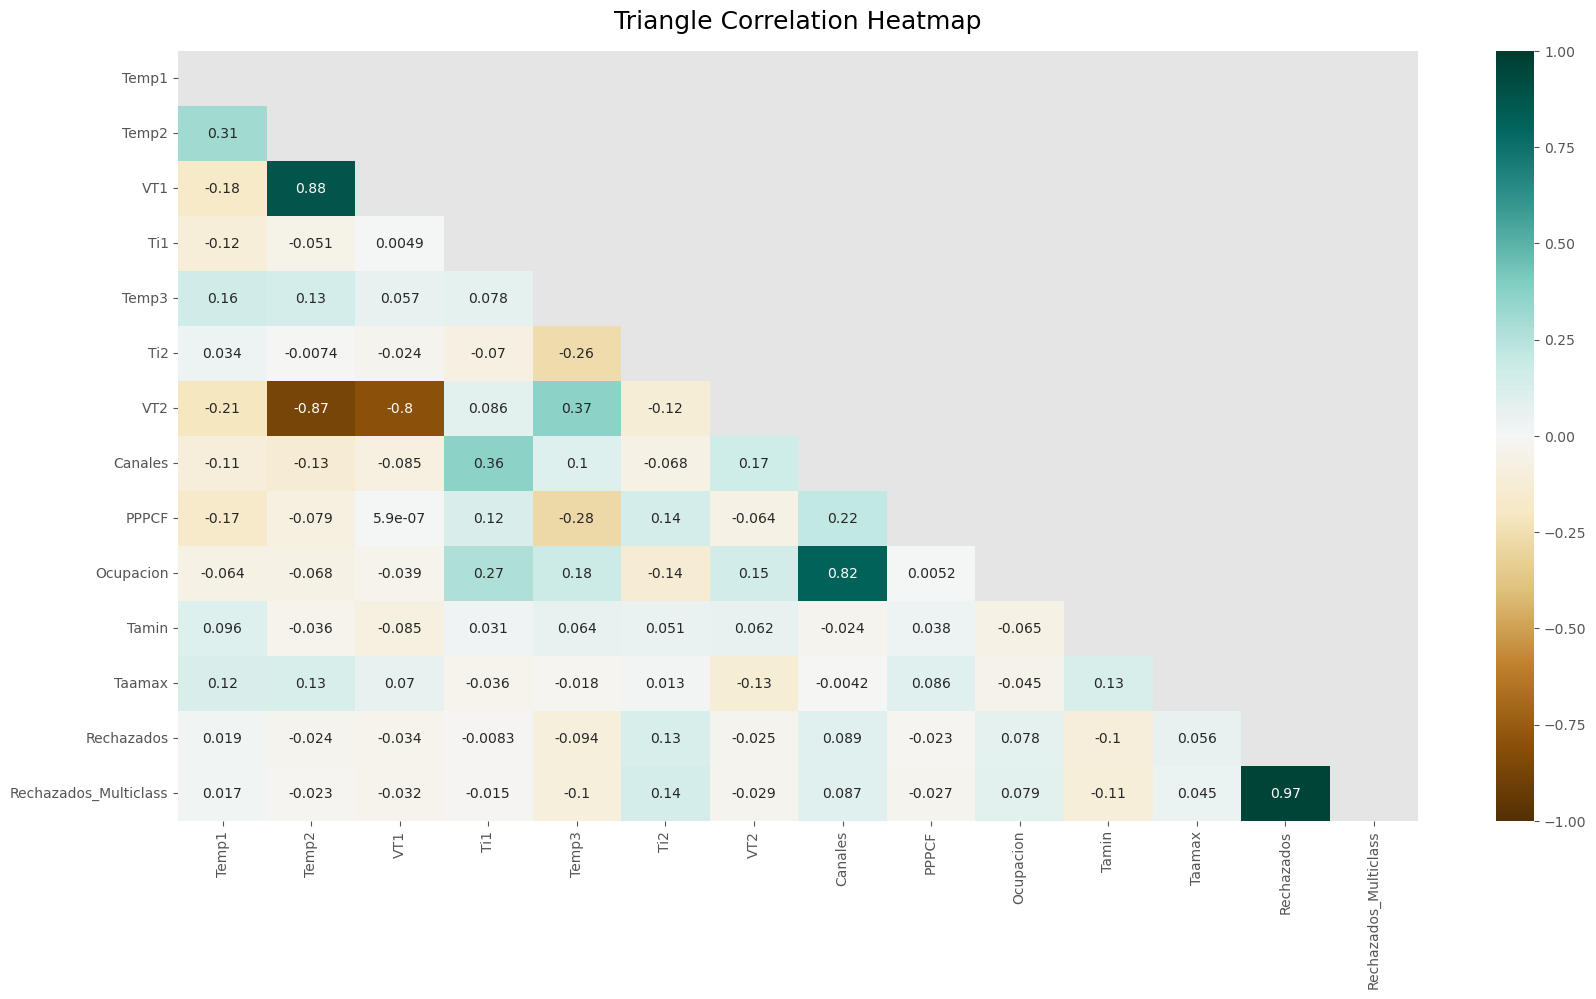

In [10]:
plt.figure(figsize=(20,10))
mask = np.triu(np.ones_like(data1.corr(), dtype=np.bool))
heatmap = sns.heatmap(data1.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

In [11]:
data1 = data1.drop(["VT1", "VT2", "Rechazados", "Canales"], axis=1)

In [12]:
data1 = pd.get_dummies(data1, drop_first = True, columns = ["Franja1", "Franja2", "Dia_Semana"]) # el parámetro drop first la primera categoría, para evitar problemas de multicolinealidad
data1 = pd.get_dummies(data1, columns = ["Refrigeracion", "pH_Requisito", "TIPO_CAP_CF"]) 

In [19]:
data1 = data1.drop(["Refrigeracion_GLICOL", "pH_Requisito_Mi_6", "TIPO_CAP_CF_PBA2"], axis=1)

In [13]:
data1.columns

Index(['Temp1', 'Temp2', 'Ti1', 'Temp3', 'Ti2', 'PPPCF', 'Ocupacion', 'Tamin',
       'Taamax', 'Rechazados_Multiclass', 'Franja1_MAÑANA',
       'Franja1_MEDIO_DIA', 'Franja1_NOCHE', 'Franja1_TARDE', 'Franja2_MAÑANA',
       'Franja2_MEDIO_DIA', 'Franja2_NOCHE', 'Franja2_TARDE',
       'Dia_Semana_lunes', 'Dia_Semana_martes', 'Dia_Semana_miércoles',
       'Dia_Semana_sábado', 'Dia_Semana_viernes', 'Refrigeracion_AMONIACO',
       'Refrigeracion_GLICOL', 'pH_Requisito_Mi_5.8', 'pH_Requisito_Mi_6',
       'TIPO_CAP_CF_C1', 'TIPO_CAP_CF_C2', 'TIPO_CAP_CF_C3',
       'TIPO_CAP_CF_PBA2'],
      dtype='object')

### Modelo con Multicolinealidad

In [14]:
data1 = sm.add_constant(data1)
modelo=sm.MNLogit(data1["Rechazados_Multiclass"], data1.drop(["Rechazados_Multiclass"], axis=1))
modelo=modelo.fit()
modelo.summary()

         Current function value: 0.744980
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                            MNLogit Regression Results                           
=================================================================================
Dep. Variable:     Rechazados_Multiclass   No. Observations:                 1914
Model:                           MNLogit   Df Residuals:                     1858
Method:                              MLE   Df Model:                           54
Date:                   Mon, 19 Jun 2023   Pseudo R-squ.:                 0.08978
Time:                           20:33:41   Log-Likelihood:                -1425.9
converged:                         False   LL-Null:                       -1566.5
Covariance Type:               nonrobust   LLR p-value:                 1.796e-32
===========================================================================================
Rechazados_Multiclass=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.7416        nan        nan        nan         nan         nan
Temp1                      -0.1659      0.064     -2.584      0.010      -0.292      -0.040
Temp2                       0.0157      0.025      0.616      0.538      -0.034       0.066
Ti1                         0.0738      0.067      1.102      0.271      -0.058       0.205
Temp3                      -0.1346      0.045     -2.962      0.003      -0.224      -0.046
Ti2                         0.0220      0.006      3.919      0.000       0.011       0.033
PPPCF                      -0.0032      0.014     -0.232      0.816      -0.030       0.024
Ocupacion                  -0.0023      0.009     -0.256      0.798      -0.020       0.015
Tamin                      -0.2831      0.078     -3.633      0.000      -0.436      -0.130
Taamax                     -0.0229      0.046     -0.495      0.621      -0.114       0.068
Franja1_MAÑANA              0.0125      1.062      0.012      0.991      -2.070       2.095
Franja1_MEDIO_DIA           0.3182      1.022      0.312      0.755      -1.684       2.320
Franja1_NOCHE               0.1477      0.970      0.152      0.879      -1.754       2.050
Franja1_TARDE               0.1108      0.999      0.111      0.912      -1.846       2.068
Franja2_MAÑANA             -1.4070      0.697     -2.018      0.044      -2.773      -0.041
Franja2_MEDIO_DIA          -1.4756      0.657     -2.245      0.025      -2.764      -0.187
Franja2_NOCHE              -1.4008      0.487     -2.874      0.004      -2.356      -0.445
Franja2_TARDE              -1.1983      0.531     -2.255      0.024      -2.240      -0.157
Dia_Semana_lunes            0.3314      0.261      1.272      0.203      -0.179       0.842
Dia_Semana_martes           0.1333      0.259      0.515      0.607      -0.374       0.641
Dia_Semana_miércoles        0.2244      0.253      0.887      0.375      -0.271       0.720
Dia_Semana_sábado          -0.3307      0.275     -1.204      0.228      -0.869       0.207
Dia_Semana_viernes         -0.3278      0.275     -1.193      0.233      -0.866       0.211
Refrigeracion_AMONIACO      1.4723   2.05e+06   7.18e-07      1.000   -4.02e+06    4.02e+06
Refrigeracion_GLICOL        1.2692   2.21e+06   5.75e-07      1.000   -4.32e+06    4.32e+06
pH_Requisito_Mi_5.8         1.5359   2.26e+06    6.8e-07      1.000   -4.42e+06    4.42e+06
pH_Requisito_Mi_6           1.2057   1.87e+06   6.46e-07      1.000   -3.66e+06    3.66e+06
TIPO_CAP_CF_C1              1.4656   2.12e+06   6.93e-07      1.000   -4.15e+06    4.15e+06
TIPO_CAP_CF_C2              1.5300   2.12e+06   7.23e-07      1.000   -4.15e+06    4.15e+06
TIPO_CAP_CF_C3              1.3506   2.23e+06   6.06e-07      1.000   -4.37e+06    4.37e+06
TIPO_CAP_CF_PBA2           -1.6047   2.23e+06   -7.2e-07      1.000   -4.37e+06    4.37e+06
--------------------------------------------------------------------------------------

### Eliminando Multicolinealidad

In [16]:
#Multicolinealidad - VIFs
pd.Series([variance_inflation_factor(data1.drop(["Rechazados_Multiclass"], axis=1), i) 
               for i in range(data1.drop(["Rechazados_Multiclass"], axis=1).shape[1])], 
              index=data1.drop(["Rechazados_Multiclass"], axis=1).columns)   

const                      0.000000
Temp1                      1.259138
Temp2                      1.285794
Ti1                        1.505831
Temp3                      1.286710
Ti2                        1.310146
PPPCF                      4.670672
Ocupacion                  1.843314
Tamin                      1.069315
Taamax                     1.090818
Franja1_MAÑANA            61.402552
Franja1_MEDIO_DIA         43.562592
Franja1_NOCHE             31.775524
Franja1_TARDE             69.290192
Franja2_MAÑANA             9.951593
Franja2_MEDIO_DIA         16.074786
Franja2_NOCHE             14.950315
Franja2_TARDE             20.890377
Dia_Semana_lunes           1.698144
Dia_Semana_martes          1.711234
Dia_Semana_miércoles       1.716613
Dia_Semana_sábado          1.794395
Dia_Semana_viernes         1.754715
Refrigeracion_AMONIACO          inf
Refrigeracion_GLICOL            inf
pH_Requisito_Mi_5.8             inf
pH_Requisito_Mi_6               inf
TIPO_CAP_CF_C1              

In [ ]:
#Eliminando la Multicolinealidad
data1 = data1.drop([ "Franja1_MAÑANA", "Franja1_MEDIO_DIA","Franja1_NOCHE", "Franja1_TARDE", "Franja2_TARDE", "TIPO_CAP_CF_C3"], axis=1)

In [21]:
#Multicolinealidad - VIFs
pd.Series([variance_inflation_factor(data1.drop(["Rechazados_Multiclass"], axis=1), i) 
               for i in range(data1.drop(["Rechazados_Multiclass"], axis=1).shape[1])], 
              index=data1.drop(["Rechazados_Multiclass"], axis=1).columns)   

const                     1148.411297
Temp1                        1.215052
Temp2                        1.240060
Ti1                          1.227530
Temp3                        1.249140
Ti2                          1.243720
PPPCF                        1.502551
Ocupacion                    1.777782
Tamin                        1.062404
Taamax                       1.077592
Franja2_MAÑANA               1.167011
Franja2_MEDIO_DIA            1.217225
Franja2_NOCHE                1.221952
Dia_Semana_lunes             1.692941
Dia_Semana_martes            1.702729
Dia_Semana_miércoles         1.711361
Dia_Semana_sábado            1.759828
Dia_Semana_viernes           1.745446
Refrigeracion_AMONIACO       1.525699
pH_Requisito_Mi_5.8          1.136335
TIPO_CAP_CF_C1               2.063130
TIPO_CAP_CF_C2               1.242790
dtype: float64

In [23]:
X = data1.drop(["Rechazados_Multiclass"], axis=1)
Y = data1["Rechazados_Multiclass"]

In [40]:
modelo=sm.MNLogit(data1["Rechazados_Multiclass"], data1.drop(["Rechazados_Multiclass"], axis=1))
RESULT=modelo.fit()
RESULT.summary()

Optimization terminated successfully.
         Current function value: 0.757827
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                            MNLogit Regression Results                           
=================================================================================
Dep. Variable:     Rechazados_Multiclass   No. Observations:                 1914
Model:                           MNLogit   Df Residuals:                     1870
Method:                              MLE   Df Model:                           42
Date:                   Mon, 19 Jun 2023   Pseudo R-squ.:                 0.07408
Time:                           21:47:20   Log-Likelihood:                -1450.5
converged:                          True   LL-Null:                       -1566.5
Covariance Type:               nonrobust   LLR p-value:                 3.872e-28
===========================================================================================
Rechazados_Multiclass=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.6585      2.479      2.282      0.022       0.799      10.518
Temp1                      -0.1502      0.062     -2.431      0.015      -0.271      -0.029
Temp2                       0.0200      0.024      0.822      0.411      -0.028       0.068
Ti1                         0.0897      0.060      1.490      0.136      -0.028       0.208
Temp3                      -0.1073      0.045     -2.374      0.018      -0.196      -0.019
Ti2                         0.0247      0.006      4.490      0.000       0.014       0.036
PPPCF                      -0.0313      0.009     -3.379      0.001      -0.049      -0.013
Ocupacion                  -0.0004      0.009     -0.045      0.964      -0.018       0.017
Tamin                      -0.2702      0.077     -3.498      0.000      -0.422      -0.119
Taamax                     -0.0314      0.046     -0.687      0.492      -0.121       0.058
Franja2_MAÑANA             -0.4326      0.284     -1.525      0.127      -0.988       0.123
Franja2_MEDIO_DIA          -0.4706      0.229     -2.052      0.040      -0.920      -0.021
Franja2_NOCHE              -0.3637      0.186     -1.958      0.050      -0.728       0.000
Dia_Semana_lunes            0.3298      0.259      1.272      0.203      -0.179       0.838
Dia_Semana_martes           0.1704      0.256      0.666      0.505      -0.331       0.672
Dia_Semana_miércoles        0.2160      0.252      0.857      0.391      -0.278       0.710
Dia_Semana_sábado          -0.3961      0.273     -1.452      0.146      -0.931       0.139
Dia_Semana_viernes         -0.3472      0.274     -1.265      0.206      -0.885       0.191
Refrigeracion_AMONIACO      0.1974      0.187      1.056      0.291      -0.169       0.564
pH_Requisito_Mi_5.8         0.3847      0.183      2.096      0.036       0.025       0.744
TIPO_CAP_CF_C1             -0.1520      0.351     -0.434      0.665      -0.839       0.535
TIPO_CAP_CF_C2             -0.0075      0.328     -0.023      0.982      -0.649       0.634
-------------------------------------------------------------------------------------------
Rechazados_Multiclass=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.3901      2.200     -0.177      0.859      -4.701       3.921
Temp1                       0.0590      0.041      1.447      0.148      -0.021       0.139
Temp2                      -0.0310      0.021     -1.458      0.145      -0.073       0.011
Ti1                        -0.1907      0.080     -2.376      0.018      -0.348      -0.033
Temp3                      -0.1337      0.037     -3.576      0.000      -0.207      -0.060
Ti2                         0.0312      0.005      6.778      0.000       0.022       0.040
PPPCF                      -0.0124      0.006     -2.095      0.036      -0.024      -

### Metrics - Modelo sin Multicolinealidad

In [47]:
from sklearn import linear_model
res=modelo.fit_regularized()
lm = linear_model.LogisticRegression(multi_class="multinomial", solver='lbfgs')
lm.fit(data1.drop(["Rechazados_Multiclass"], axis=1), data1["Rechazados_Multiclass"])
print("AIC")
print(res.aic)
print(metrics.classification_report(data1["Rechazados_Multiclass"], lm.predict(data1.drop(["Rechazados_Multiclass"], axis=1))))

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7578266238902627
            Iterations: 199
            Function evaluations: 213
            Gradient evaluations: 199
AIC
2988.9603162519256
              precision    recall  f1-score   support

           0       0.70      0.98      0.82      1329
           1       0.25      0.00      0.01       222
           2       0.30      0.04      0.07       363

    accuracy                           0.69      1914
   macro avg       0.42      0.34      0.30      1914
weighted avg       0.57      0.69      0.58      1914



array([[1306,    2,   21],
       [ 209,    1,   12],
       [ 348,    1,   14]], dtype=int64)

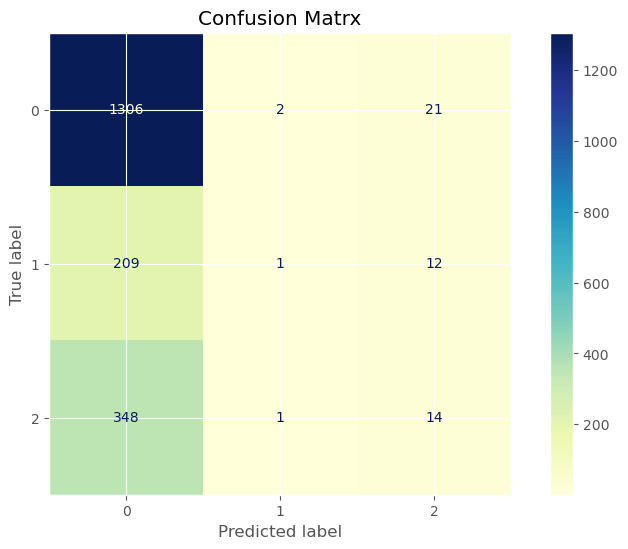

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(lm, data1.drop(["Rechazados_Multiclass"], axis=1), data1["Rechazados_Multiclass"], ax = ax, cmap="YlGnBu")
disp.confusion_matrix

## Solo Variables Significativas 

In [52]:
data2 = data1.drop(['Temp2',  'Dia_Semana_lunes', 'Dia_Semana_martes', 'Dia_Semana_miércoles', 'Dia_Semana_sábado', 'Refrigeracion_AMONIACO', 'TIPO_CAP_CF_C2'], axis=1)	

In [53]:
model2=sm.MNLogit(data2["Rechazados_Multiclass"], data2.drop(["Rechazados_Multiclass"], axis=1))

In [54]:
res2=model2.fit_regularized()
lm2 = linear_model.LogisticRegression(multi_class="multinomial", solver='lbfgs')
lm2.fit(data2.drop(["Rechazados_Multiclass"], axis=1), data2["Rechazados_Multiclass"])
print("AIC")
print(res2.aic)
print(metrics.classification_report(data2["Rechazados_Multiclass"], lm2.predict(data2.drop(["Rechazados_Multiclass"], axis=1))))

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7645428933829665
            Iterations: 139
            Function evaluations: 154
            Gradient evaluations: 139
AIC
2986.670195869996
              precision    recall  f1-score   support

           0       0.70      0.98      0.82      1329
           1       0.25      0.00      0.01       222
           2       0.39      0.06      0.10       363

    accuracy                           0.69      1914
   macro avg       0.45      0.35      0.31      1914
weighted avg       0.59      0.69      0.59      1914



===============================================================================================================================================================

# MACHINE LEARNING

===============================================================================================================================================================

In [56]:
X = data1.drop(["Rechazados_Multiclass"], axis=1)
Y = data1["Rechazados_Multiclass"]

In [57]:
# Dividimos los conjuntos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=1234)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [58]:
#Entrenamosel modelo y obtenemos accuracy
logit_model= sm.MNLogit(y_train, X_train)

## Metrics

In [59]:
res3=logit_model.fit_regularized()
lm3 = linear_model.LogisticRegression(multi_class="multinomial", solver='lbfgs')
lm3.fit(X_train, y_train)
print("AIC")
print(res3.aic)
print(metrics.classification_report(y_test, lm3.predict(X_test)))

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7572644357167193
            Iterations: 207
            Function evaluations: 221
            Gradient evaluations: 207
AIC
2406.7437021645947
              precision    recall  f1-score   support

           0       0.73      0.98      0.83       274
           1       0.00      0.00      0.00        49
           2       0.27      0.05      0.08        60

    accuracy                           0.71       383
   macro avg       0.33      0.34      0.31       383
weighted avg       0.56      0.71      0.61       383

